In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import sys
import os

sys.path.append("../")
from RNN_Class import *

In [ ]:
# reordering: taken from panel C in Figure4.py
hidden_n = 200
seq_n = 10
samples_n = 20
io_n = 68


model_path = "../Elman_SGD/predloss/no-mask/"
data_path = "../Elman_SGD/predloss/"
model_name = "baseline-07092025"
data_name = f"MNIST_68PC_SeqN{seq_n}_Ns{samples_n}"
model = ElmanRNN_pred(io_n, hidden_n, io_n)
model.act = nn.Tanh()
net = torch.load(model_path + model_name + ".pth.tar")
data = torch.load(data_path + data_name + ".pth.tar")
X_mini = data["X_mini"][:, :-1, :]
model.load_state_dict(net["final_state_dict"])
W = net["final_state_dict"]["hidden_linear.weight"].cpu().numpy()

hidden = np.zeros((hidden_n, seq_n - 1))
hidden_new = np.zeros((hidden_n, seq_n - 1))
output = np.zeros((io_n, seq_n - 1))
output_new = np.zeros((io_n, seq_n - 1))
h = torch.zeros(1, 1, hidden_n)
for t in np.arange(seq_n - 1):
    o, h = model(X_mini[0:1, t : t + 1, :], h)
    hidden[:, t] = h.detach().numpy()[0, 0, :]
    output[:, t] = o.detach().numpy()[0, 0, :]

h = torch.zeros(1, 1, hidden_n)
for t in np.arange(seq_n - 1):
    o, h = model(X_mini[1:2, t : t + 1, :], h)
    hidden_new[:, t] = h.detach().numpy()[0, 0, :]
    output_new[:, t] = o.detach().numpy()[0, 0, :]

hidden_pool = [hidden, hidden_new]
idx = []
c_max = np.abs(W).max()
plt.figure(figsize=(6, 3))
for i in range(2):
    idx.append(np.argsort(np.argmax(hidden_pool[i], axis=1)))
    plt.subplot(1, 2, i + 1)
    plt.imshow(
        W[idx[i], :][:, idx[i]], cmap="RdBu_r", vmin=-1.001 * c_max, vmax=1.001 * c_max
    )
    crange = [-c_max, 0, c_max]
    cbar = plt.colorbar(ticks=crange)
    cbar.ax.set_yticklabels(["{:.3f}".format(item) for item in crange])
    plt.xlabel("Presynaptic neuron")
    plt.ylabel("Postsynaptic neuron")
    plt.title("W: Env{} sorted".format(i + 1))
    plt.rc("font", size=12)
    plt.rc("axes", titlesize=16, labelsize=16)

plt.tight_layout()
plt.savefig(Path + model_name + "_W_sorted.eps")
plt.close()

In [43]:
X_mini.shape

torch.Size([20, 9, 68])

torch.Size([1, 1, 68])
torch.Size([1, 1, 68])
torch.Size([1, 1, 68])
torch.Size([1, 1, 68])
torch.Size([1, 1, 68])
torch.Size([1, 1, 68])
torch.Size([1, 1, 68])
torch.Size([1, 1, 68])
torch.Size([1, 1, 68])


In [13]:
# outputs = torch.load("../Elman_SGD/predloss/baseline_07022025.pth.tar")
baseline = torch.load("../Elman_SGD/predloss/no-mask/baseline-07092025.pth.tar")
outputs = torch.load("../Elman_SGD/predloss/no-mask/all-xavier-07092025.pth.tar")

In [9]:
# np.diagonal(initial_state_dict["hidden_linear.weight"].numpy())
# np.diagonal(initial_state_dict["hidden_linear.weight"].numpy(), offset=1)
# np.diagonal(initial_state_dict["hidden_linear.weight"].numpy(), offset=-1)

/home/mwagner/bin/anaconda3/envs/hcprediction/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


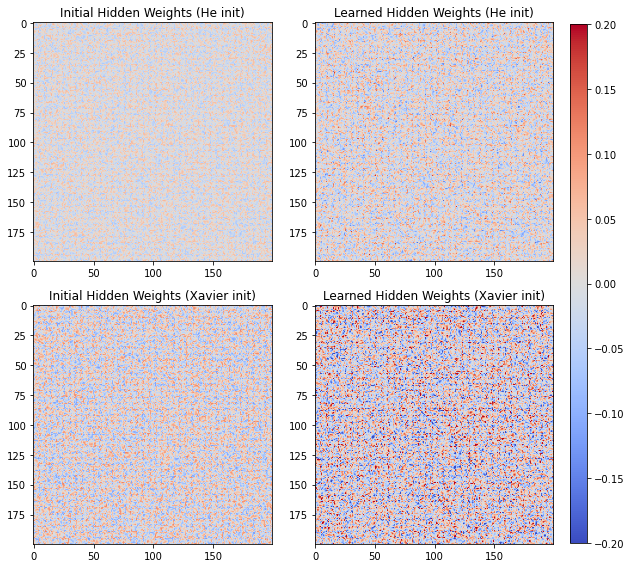

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

images = [
    baseline["initial_state_dict"]["hidden_linear.weight"].numpy(),
    baseline["final_state_dict"]["hidden_linear.weight"].cpu().numpy(),
    outputs["initial_state_dict"]["hidden_linear.weight"].numpy(),
    outputs["final_state_dict"]["hidden_linear.weight"].cpu().numpy(),
]

titles = [
    "Initial Hidden Weights (He init)",
    "Learned Hidden Weights (He init)",
    "Initial Hidden Weights (Xavier init)",
    "Learned Hidden Weights (Xavier init)",
]

vmin = -0.2
vmax = 0.2

ims = []
i = 0
for ax, img in zip(axes.flat, images):
    im = ax.imshow(img, cmap="coolwarm", vmin=vmin, vmax=vmax)
    ax.set_title(titles[i])
    i += 1

# shared colorbar
cbar_ax = fig.add_axes([1, 0.05, 0.03, 0.9])  # [left, bottom, width, height]
fig.colorbar(im, cax=cbar_ax)

plt.tight_layout()
plt.show()

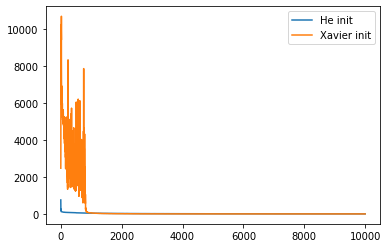

In [17]:
start_x = 0

plt.plot(baseline["loss"][start_x:], label="He init")
plt.plot(outputs["loss"][start_x:], label="Xavier init")
plt.legend()
plt.show()

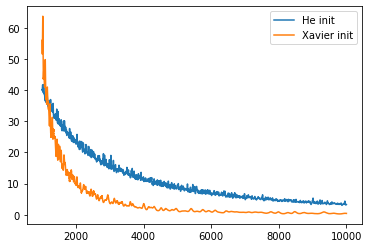

In [21]:
start_x = 1000

plt.plot(range(start_x, 10000), baseline["loss"][start_x:], label="He init")
plt.plot(range(start_x, 10000), outputs["loss"][start_x:], label="Xavier init")
plt.legend()
plt.show()